## Dataset Description

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_payment_fraud_dataset.csv')
df.head(3)


,step,type,amount,nameOrig,oldbalanceOrg,nameDest,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,7,TRANSFER,39025.480348,C314750,77767.192007,M824979,38741.711659,50286.593480,89312.073829,0,0
1,20,TRANSFER,7194.938794,C199714,45672.700385,M627212,38477.761591,22563.047798,29757.986593,0,0
2,29,CASH_OUT,14972.627681,C693509,93391.120500,M761616,78418.492819,29414.191540,44386.819221,0,0


**Number of feature and data point**

In [27]:
df.shape

(6362620, 11)

**Feature Types**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   nameDest        object 
 6   newbalanceOrig  float64
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


**Data Analysis**

In [29]:
df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'CASH_IN', 'PAYMENT', 'DEBIT'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

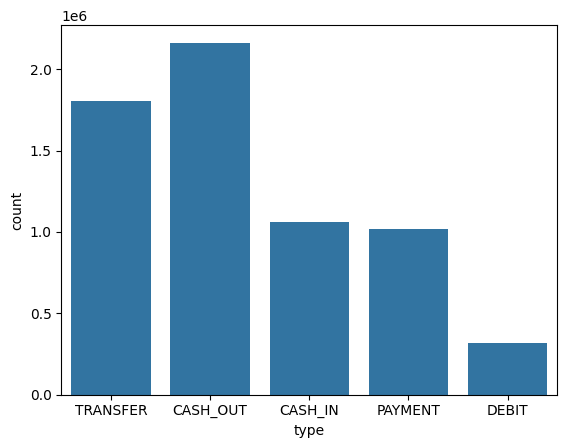

In [30]:
sns.countplot(df,x='type')

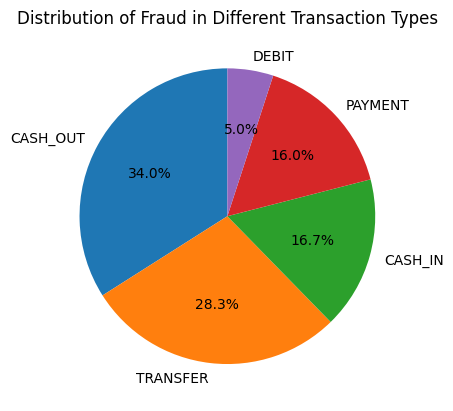

In [31]:
fraud_df = df[df['isFraud'] == 1]
fraud_type_counts = fraud_df['type'].value_counts()

plt.pie(fraud_type_counts, labels=fraud_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraud in Different Transaction Types')
plt.show()

**Correlation Analysis**

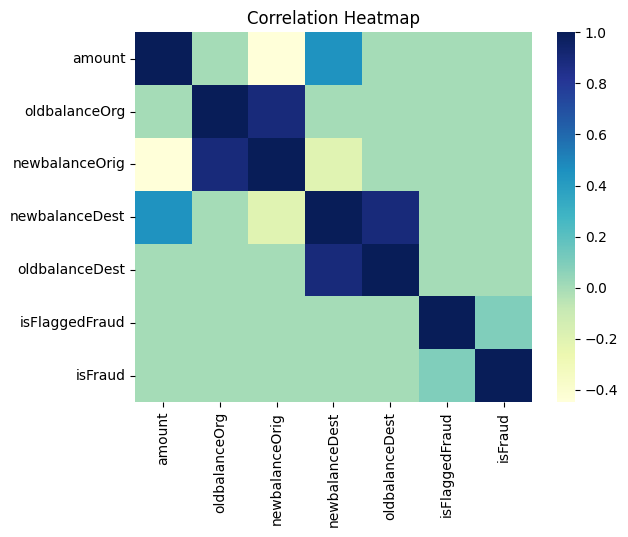

In [32]:
num_cols=['amount','oldbalanceOrg','newbalanceOrig','newbalanceDest','oldbalanceDest','isFlaggedFraud','isFraud']
corr_matrix=df[num_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

**Imbalanced Dataset**

In [33]:
fraud_count =df['isFraud'].value_counts()
fraud_count

isFraud
0    4536955
1    1825665
Name: count, dtype: int64

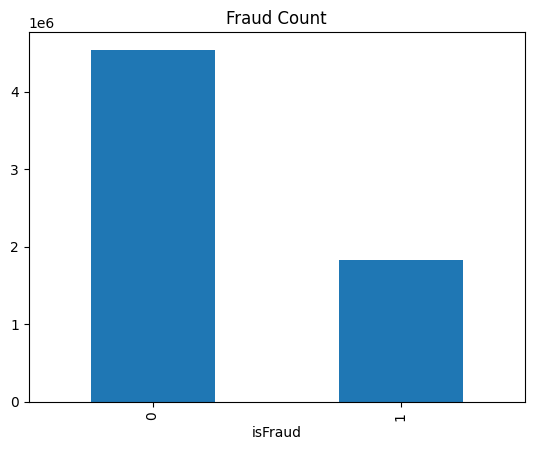

In [34]:
fraud_count.plot(kind='bar', title='Fraud Count')
plt.show()

## Data Pre-Processing

**Feature Selection**

In [35]:
df=df.drop(columns=['step','nameDest','nameOrig'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [36]:
df=df.drop(columns=['oldbalanceOrg','oldbalanceDest'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   newbalanceOrig  float64
 3   newbalanceDest  float64
 4   isFraud         int64  
 5   isFlaggedFraud  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 291.3+ MB


**Null Values**

In [37]:
df.isnull().sum()

type                  0
amount            63626
newbalanceOrig        0
newbalanceDest        0
isFraud               0
isFlaggedFraud        0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(df[['amount']])

df['amount'] = impute.transform(df[['amount']])

In [39]:
df.isnull().sum()

type              0
amount            0
newbalanceOrig    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Duplicated**

In [40]:
df.duplicated().sum()

0

**Final Feature and Target**

In [41]:
input_cols = ['type', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFlaggedFraud']
tar_col = ['isFraud']

input_cols = pd.DataFrame(input_cols, columns=['Feature'])
tar_col = pd.DataFrame(tar_col, columns=['Target'])

x = df[input_cols['Feature']]
y = df[tar_col['Target']]

num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

## Feature scaling

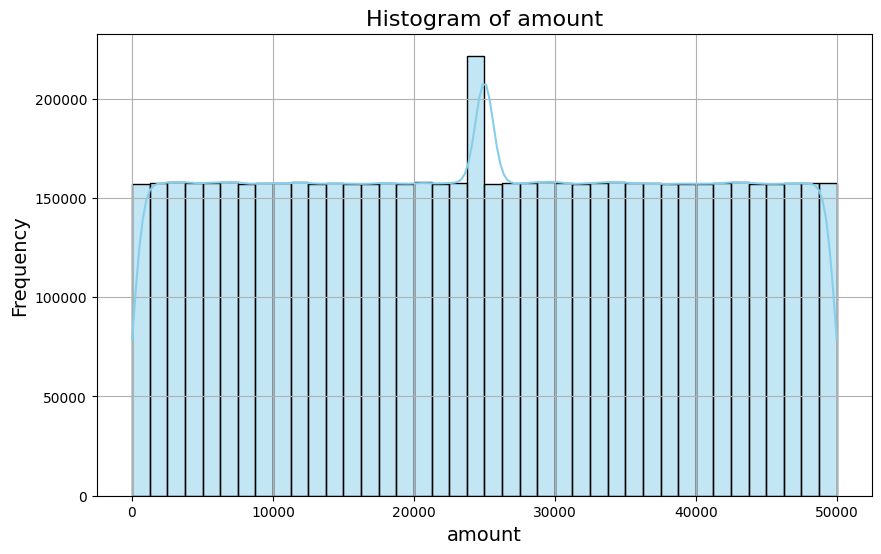

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


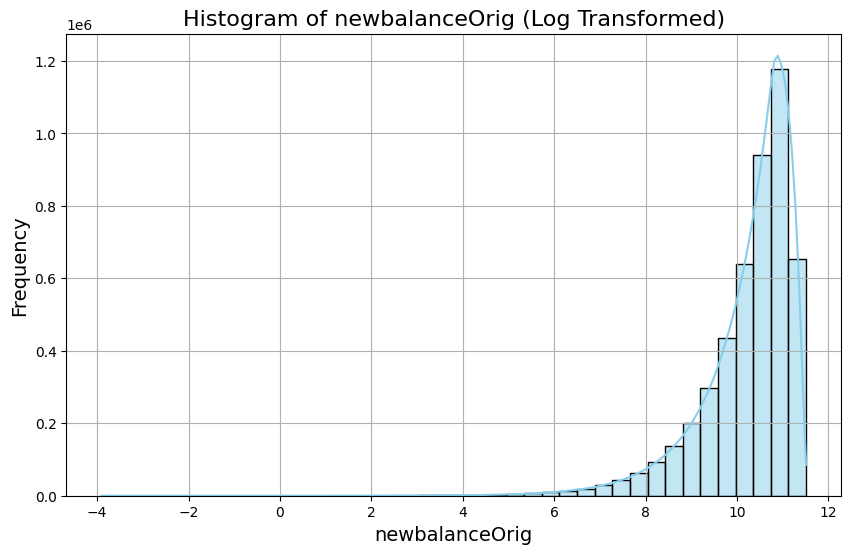

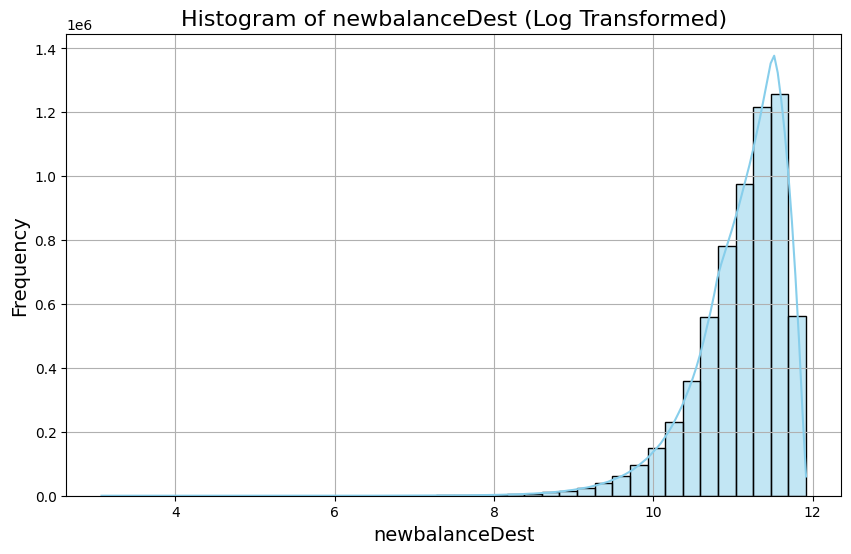

In [42]:
def plot_histogram(data, column, bins=40, kde=True, color='skyblue', log_transform=False):
    plt.figure(figsize=(10, 6))
    if log_transform:
        sns.histplot(np.log1p(data[column]), bins=bins, kde=kde, color=color)
        plt.title(f'Histogram of {column} (Log Transformed)', fontsize=16)
    else:
        sns.histplot(data[column], bins=bins, kde=kde, color=color)
        plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid()
    plt.show()

plot_histogram(df, 'amount')
plot_histogram(df, 'newbalanceOrig', log_transform=True)
plot_histogram(df, 'newbalanceDest', log_transform=True)


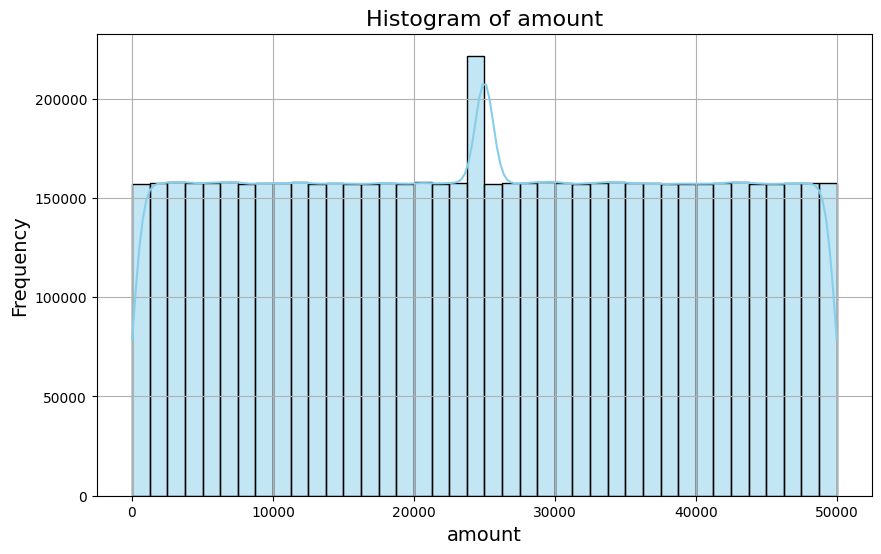

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


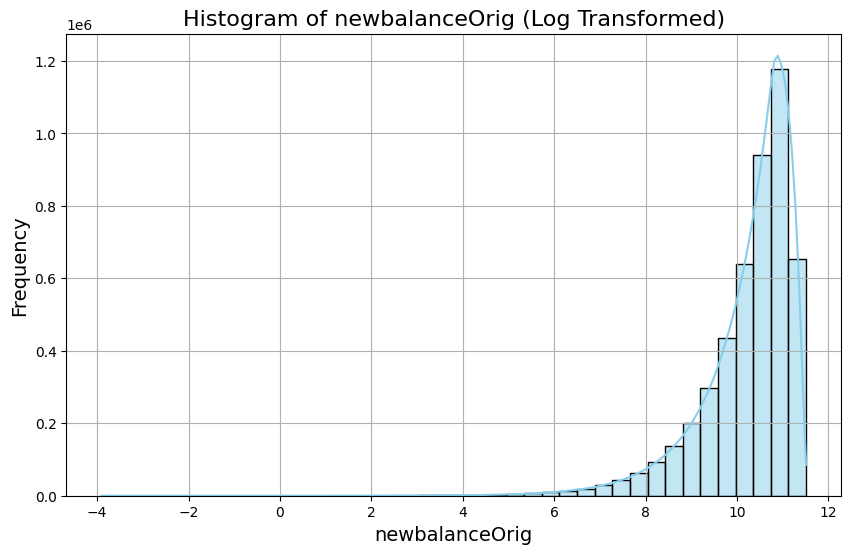

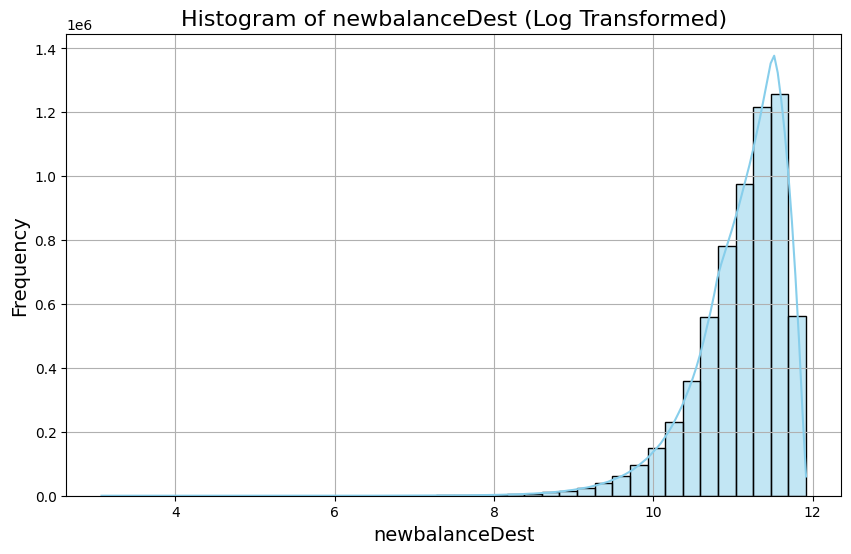

In [ ]:
def plot_histogram(data, column, bins=40, kde=True, color='skyblue', log_transform=False):
    plt.figure(figsize=(10, 6))
    if log_transform:
        sns.histplot(np.log1p(data[column]), bins=bins, kde=kde, color=color)
        plt.title(f'Histogram of {column} (Log Transformed)', fontsize=16)
    else:
        sns.histplot(data[column], bins=bins, kde=kde, color=color)
        plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid()
    plt.show()

plot_histogram(df, 'amount')
plot_histogram(df, 'newbalanceOrig', log_transform=True)
plot_histogram(df, 'newbalanceDest', log_transform=True)


In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x_minmax_scaled = scaler.transform(x[num_cols])

# StandardScaler
sc = StandardScaler()
x_standard_scaled = sc.fit_transform(x[num_cols])

# RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(x[num_cols])
x_robust_scaled = robust_scaler.transform(x[num_cols])


## Encoding categorical data

In [44]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical column 'type'
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(x[['type']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['type']))

# Concatenate the encoded columns with the original dataframe
x_encoded = pd.concat([x.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Define the encoded list
encoded_list = encoded_df.columns.tolist()

# MinMaxScaler
x_minmax_scaled_df = pd.concat([pd.DataFrame(x_minmax_scaled, columns=num_cols), x_encoded[encoded_list]], axis=1)

# StandardScaler
x_standard_scaled_df = pd.concat([pd.DataFrame(x_standard_scaled, columns=num_cols), x_encoded[encoded_list]], axis=1)

# RobustScaler
x_robust_scaled_df = pd.concat([pd.DataFrame(x_robust_scaled, columns=num_cols), x_encoded[encoded_list]], axis=1)

print('MinmaxScaler', x_minmax_scaled_df.head())
print('StandardScaler',x_standard_scaled_df.head())
print('RobustScaler',x_robust_scaled_df.head())

MinmaxScaler      amount  newbalanceOrig  newbalanceDest  isFlaggedFraud  type_CASH_IN  \
0  0.780466        0.591673        0.595575             0.0           0.0   
1  0.143727        0.589913        0.198349             0.0           0.0   
2  0.299312        0.856289        0.295923             0.0           0.0   
3  0.774331        0.552490        0.733628             0.0           0.0   
4  0.814583        0.459183        0.618908             0.0           0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0            0.0         0.0           0.0            1.0  
1            0.0         0.0           0.0            1.0  
2            1.0         0.0           0.0            0.0  
3            1.0         0.0           0.0            0.0  
4            1.0         0.0           0.0            0.0  
StandardScaler      amount  newbalanceOrig  newbalanceDest  isFlaggedFraud  type_CASH_IN  \
0  0.976682        0.425327        0.443789       -0.060099           0.

## Data splitting

In [45]:
from sklearn.model_selection import train_test_split

# Split the MinMax scaled data
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(x_minmax_scaled_df, y, test_size=0.3, random_state=42, stratify=y)

# Split the Standard scaled data
x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard_scaled_df, y, test_size=0.3, random_state=42, stratify=y)

# Split the Robust scaled data
x_train_robust, x_test_robust, y_train_robust, y_test_robust = train_test_split(x_robust_scaled_df, y, test_size=0.3, random_state=42, stratify=y)


## Model Selection

**Scatter Plot**

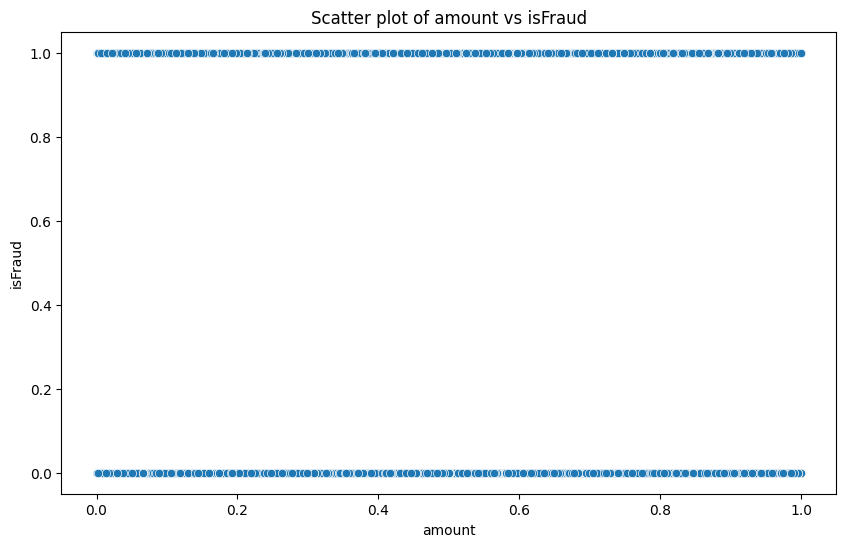

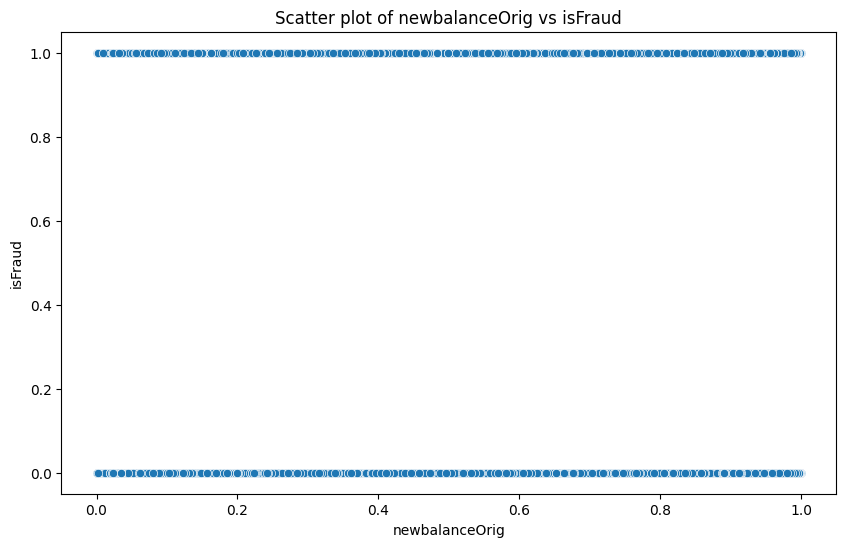

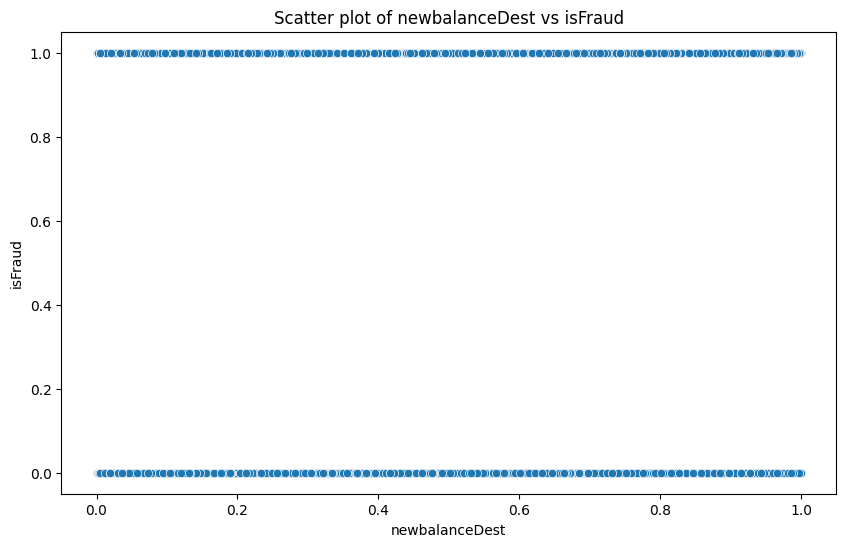

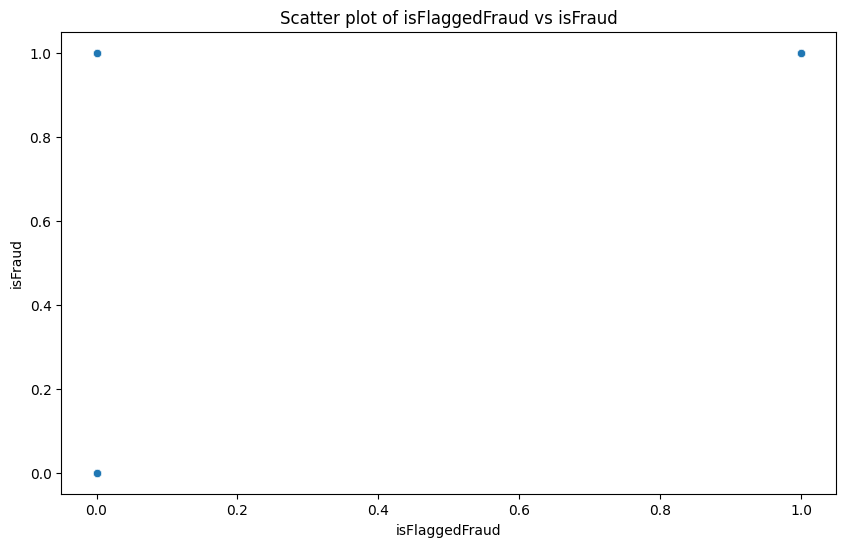

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'isFraud'

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_train_minmax[col], y=y_train_minmax[target])
    plt.title(f'Scatter plot of {col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()

## Model training and testing

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error

def train_test_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Accuracy score of {model} is: {accuracy}')
    print(f'{classification_report(y_test, y_pred)}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')

    mx = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(mx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, precision, recall, f1, mse, rmse

# Initialize models
def initialize_model(model_name):

    model = model_name

    print(f'Training {model_name} on MinMax scaled data')
    results_minmax = train_test_model(model, x_train_minmax, y_train_minmax, x_test_minmax, y_test_minmax)

    print(f'Training {model_name} on Standard scaled data')
    results_standard = train_test_model(model, x_train_standard, y_train_standard, x_test_standard, y_test_standard)

    print(f'Training {model_name} on Robust scaled data')
    results_robust = train_test_model(model, x_train_robust, y_train_robust, x_test_robust, y_test_robust)
    print('\n')

    # Plotting the results
    score_list = [
        [results_minmax[1], results_minmax[2], results_minmax[0], results_minmax[3], results_minmax[4], results_minmax[5], 'MinMax'],
        [results_standard[1], results_standard[2], results_standard[0], results_standard[3], results_standard[4], results_standard[5], 'Standard'],
        [results_robust[1], results_robust[2], results_robust[0], results_robust[3], results_robust[4], results_robust[5], 'Robust']
    ]

    bp = pd.DataFrame(score_list, columns=['Precision', 'Recall', 'Accuracy', 'F1 score', 'MSE', 'RMSE', 'Scaler'])
    bp = pd.melt(frame=bp, id_vars='Scaler', var_name='Score', value_name='value')
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.barplot(ax=ax, data=bp, x='Scaler', y='value', hue='Score', palette='mako')
    plt.title("Comparison by Scalers")
    plt.show()


**Logistic Regression**

Training LogisticRegression() on MinMax scaled data


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of LogisticRegression() is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


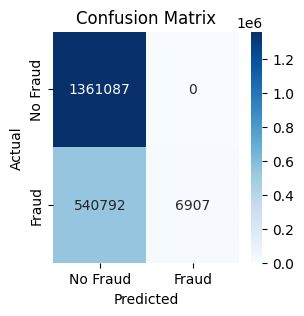

Training LogisticRegression() on Standard scaled data


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of LogisticRegression() is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


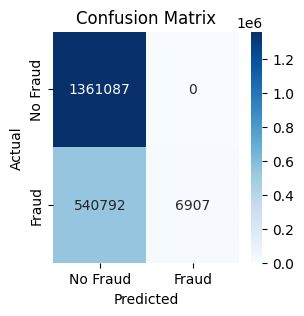

Training LogisticRegression() on Robust scaled data


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of LogisticRegression() is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


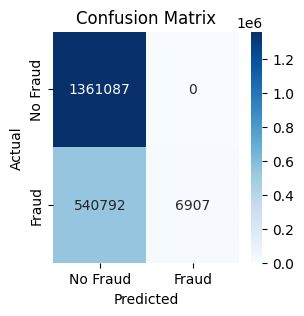

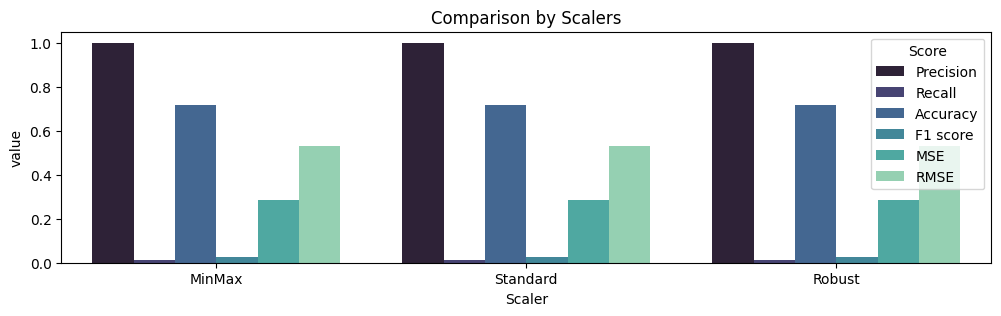

In [53]:
from sklearn.linear_model import LogisticRegression
initialize_model(LogisticRegression())

**Decision Tree**

Training DecisionTreeClassifier(max_depth=4) on MinMax scaled data
Accuracy score of DecisionTreeClassifier(max_depth=4) is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


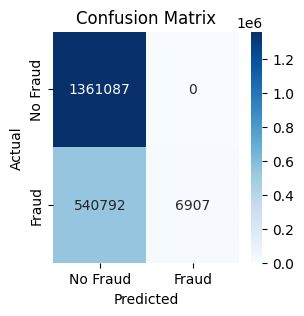

Training DecisionTreeClassifier(max_depth=4) on Standard scaled data
Accuracy score of DecisionTreeClassifier(max_depth=4) is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


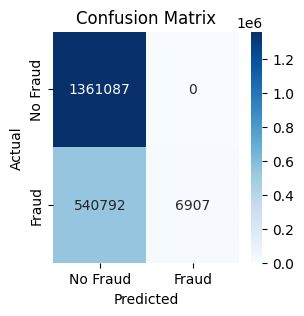

Training DecisionTreeClassifier(max_depth=4) on Robust scaled data
Accuracy score of DecisionTreeClassifier(max_depth=4) is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


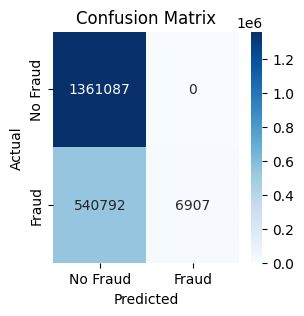

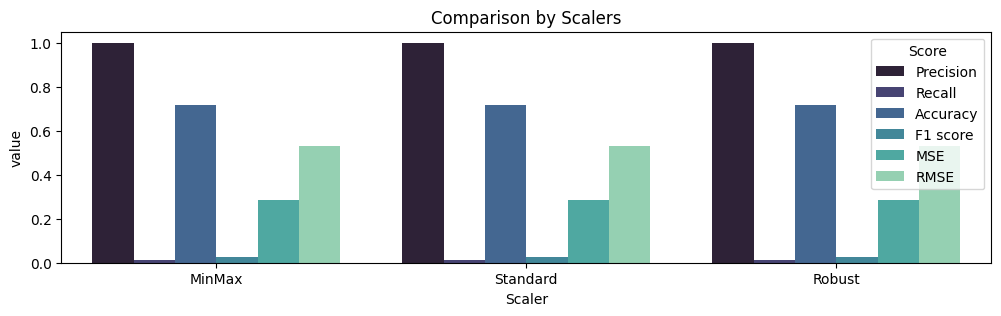

In [54]:
from sklearn.tree import DecisionTreeClassifier
initialize_model(DecisionTreeClassifier(max_depth=4))

**Gaussian Naive Bayes**

Training GaussianNB() on MinMax scaled data


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of GaussianNB() is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


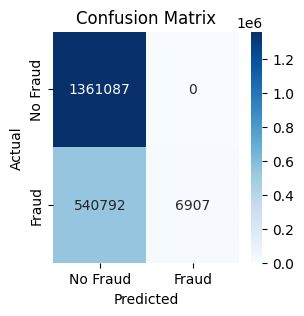

Training GaussianNB() on Standard scaled data


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of GaussianNB() is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


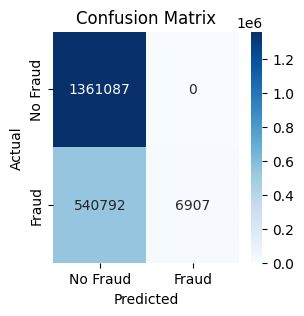

Training GaussianNB() on Robust scaled data


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of GaussianNB() is: 0.7166827501878157
              precision    recall  f1-score   support

           0       0.72      1.00      0.83   1361087
           1       1.00      0.01      0.02    547699

    accuracy                           0.72   1908786
   macro avg       0.86      0.51      0.43   1908786
weighted avg       0.80      0.72      0.60   1908786

Mean Squared Error: 0.2833172498121843
Root Mean Squared Error: 0.532275539370526


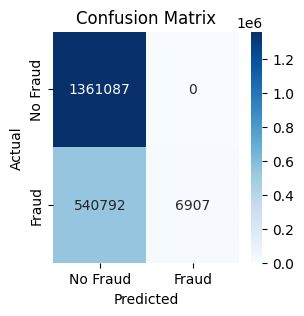

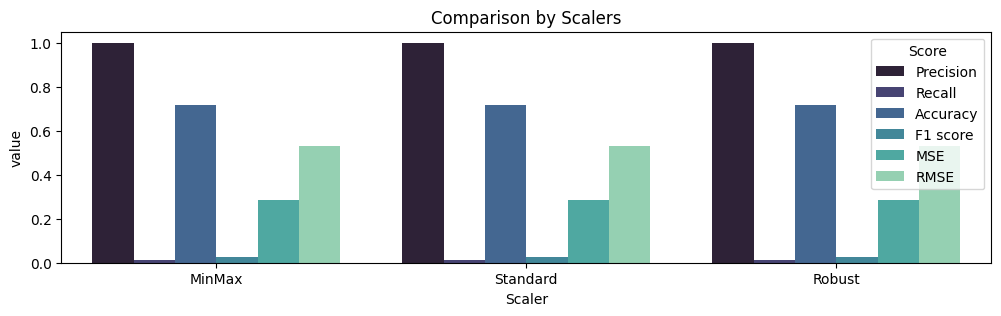

In [55]:
from sklearn.naive_bayes import GaussianNB
initialize_model(GaussianNB())